# Acquire and Analyze Project

# Initialize Twitter API 

In [1]:
import tweepy
import pandas as pd
import tweepy
import os
import datetime
import re
from string import punctuation
from nltk.probability import FreqDist
import nltk
import numpy as np
from collections import Counter
from pprint import pprint
from nltk.corpus import stopwords
from collections import Counter
sw = stopwords.words('english')
import sqlite3
import spacy
from subject_object_extraction import findSVOs

In [2]:
from fanok_api_keys import api_key, api_key_secret, bearer_token,access_token, access_token_secret

In [3]:
#authentication

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#API Connection

api = tweepy.API(auth)

# Pulling our text data (Republican)

In [4]:
user = 'tedcruz'
repub_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items()

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [5]:
user = 'mtgreenee'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items()

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])


In [6]:
user = 'laurenboebert'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items()

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [7]:
keywords = '#MAGA'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 300, 
                        tweet_mode = 'extended').items()

for tweet in tweets:
    repub_data.append([keywords,tweet.full_text])

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

# Pulling our text data (Democratic)

In [11]:
user = 'AOC'
dem_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [12]:
user = 'potus'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(250)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [13]:
user = 'HillaryClinton'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items()

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [ ]:
keywords = '#Democrat'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    dem_data.append([keywords,tweet.full_text])

# Building our Republican DF

In [14]:
columns = ['User/Keyword', 'Tweets']
republican_df = pd.DataFrame(repub_data, columns = columns)

In [15]:
republican_df

,User/Keyword,Tweets
0,tedcruz,Now do Biden giving the eulogy—just 11 years a...
1,tedcruz,"Georgia— if Raphael Warnock wins, Democrats ar..."
2,tedcruz,"ICYMI: Oil, Racism &amp; CBS Discovers Hunter ..."
3,tedcruz,RT @Wodins: @tedcruz Myself standing at the to...
4,tedcruz,"Of course not. \n\nIf they were Marxists, they..."
...,...,...
21305,#MAGA,@GOPLeader DO THE WILL OF THE PEOPLE AND WHAT...
21306,#MAGA,RT @haldonahue: Lifetime @NRA member and notor...
21307,#MAGA,The UK quietly buys up Russian oil 👀 \n\n#pol...
21308,#MAGA,RT @ltgrusselhonore: Let’s Be Clear #Putin and...


# Building our Democratic DF

In [16]:
columns = ['User/Keyword', 'Tweets']
democratic_df = pd.DataFrame(dem_data, columns = columns)

In [17]:
democratic_df

,User/Keyword,Tweets
0,AOC,RT @RobertMackey: Elon Musk's Twitter just sus...
1,AOC,RT @HuffPostPol: Rep. Alexandria Ocasio-Cortez...
2,AOC,RT @lisatozzi: “It’s affecting our culture if ...
3,AOC,RT @POTUS: I'm confident that our student debt...
4,AOC,RT @RollingStone: In an interview with Rolling...
...,...,...
3789,HillaryClinton,"A week ago, 200,000 previously uninsured Virgi..."
3790,HillaryClinton,"RT @IlhanMN: At this moment, somewhere in the ..."
3791,HillaryClinton,Our democracy is broken. House Democrats' firs...
3792,HillaryClinton,RT @NYGovCuomo: Today we are sending a strong ...


# Cleaning Tweets for Analysis

In [18]:
punct_set = punctuation

In [19]:
repub_names = ['ted', 'cruz', 'tedcruz', 'mtgreene', 'lauren','boebert']

In [20]:
#First let's make both our lists long strings

repub_data_list= [','.join(w) for w in repub_data]

#This gives us a long string of text
repub_data_string = ''.join(repub_data_list)

#this tokenizes our tweet data
repub_data_tokenized_string = [w.lower() for w in repub_data_string.split() if w not in repub_names and w not in sw and w.isalpha() and w not in punct_set]


In [21]:
#repub_data_string
#repub_data_tokenized_string

In [22]:
dem_names = ['AOC', 'POTUS', 'HillaryClinton']

In [23]:
#First let's make both our lists long strings

dem_data_list= [','.join(w) for w in dem_data]

#This gives us a long string of text
dem_data_string = ''.join(dem_data_list)

#this tokenizes our tweet data
dem_data_tokenized_string = [w.lower() for w in dem_data_string.split() if w not in dem_names and w not in sw and w.isalpha() and w not in punct_set]

In [24]:
#dem_data_string
#dem_data_tokenized_string

# Analysis 1: Most Popular Words

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Most Popular Words: Republican

In [35]:
repub_freqdist = FreqDist()

for word in repub_data_tokenized_string:
    repub_freqdist[word]+=1  

In [36]:
repub_top_words = repub_freqdist.most_common(20) 

In [37]:
columns = ['word', 'count']

repub_words_df = pd.DataFrame(repub_top_words,columns = columns) 

In [66]:
#repub_words_df

<AxesSubplot:title={'center':'Republican Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

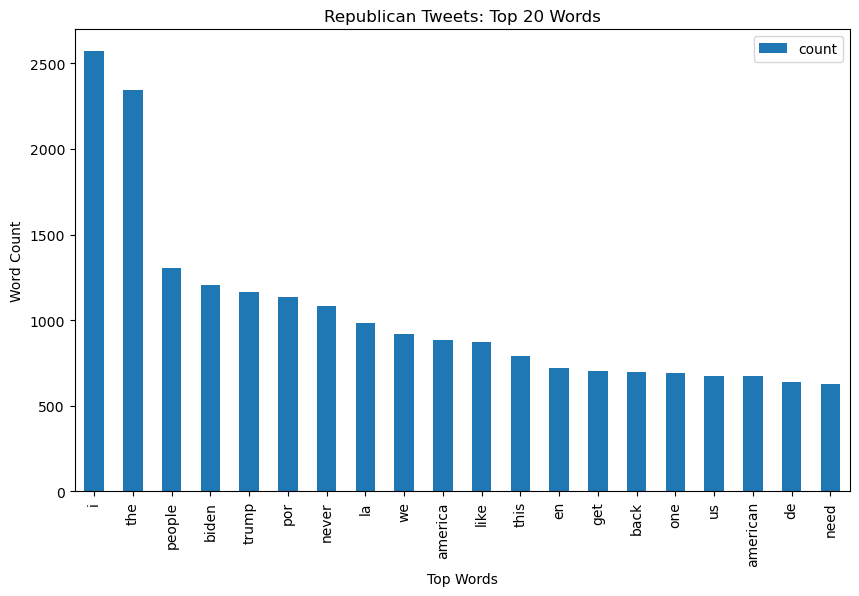

In [65]:
repub_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Republican Tweets: Top 20 Words')

# Most Popular Words: Democratic

In [67]:
dem_freqdist = FreqDist()

for word in dem_data_tokenized_string:
    dem_freqdist[word]+=1  

In [68]:
dem_top_words = dem_freqdist.most_common(20) 

In [69]:
columns = ['word', 'count']

dem_words_df = pd.DataFrame(dem_top_words,columns = columns) 

In [71]:
#dem_words_df

<AxesSubplot:title={'center':'Democratic Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

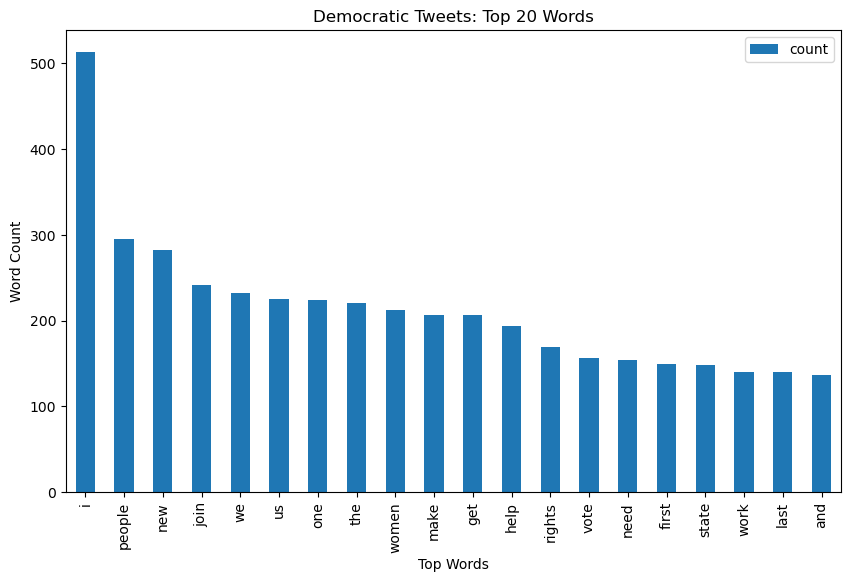

In [72]:
dem_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Democratic Tweets: Top 20 Words')

# Analysis 2: Text Patterns

First lets add our Text Patterns function

In [23]:
def get_patterns(text)  :
    """
        This function takes text as an input and returns a dictionary of statistics,
        after cleaning the text. 
    
    """
    
    # We'll make things a big clearer by initializing the 
    # statistics here. These are placeholder values.
    total_tokens = 0
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    # Do your tokenization and normalization here
    
    text = [w.lower() for w in text.split() if w.lower() not in sw and w.isalpha()]
    
    
    
    # Calculate your statistics here
    total_tokens = len(text)
    unique_tokens = len(set(text))
    avg_token_len = sum(len(w) for w in text) / len(text)
    lex_diversity = unique_tokens/total_tokens
    text_count= Counter(text)
    top_10 = text_count.most_common(10)
    
    
    # Now we'll fill out the dictionary. 
    
    results = {'tokens':total_tokens,
               'unique_tokens':unique_tokens,
               'avg_token_length':avg_token_len,
               'lexical_diversity':lex_diversity,
               'top_10':top_10}

    return(results)


# Republican Results

In [24]:
get_patterns(repub_data_string)

{'tokens': 9466,
 'unique_tokens': 3144,
 'avg_token_length': 6.008662581871963,
 'lexical_diversity': 0.3321360659201352,
 'top_10': [('people', 110),
  ('biden', 78),
  ('democrats', 56),
  ('get', 49),
  ('trump', 45),
  ('time', 43),
  ('vote', 40),
  ('want', 39),
  ('us', 38),
  ('one', 37)]}

# Democratic Results

In [25]:
get_patterns(dem_data_string)

{'tokens': 9476,
 'unique_tokens': 3196,
 'avg_token_length': 6.173490924440692,
 'lexical_diversity': 0.3372731110173069,
 'top_10': [('people', 67),
  ('one', 57),
  ('get', 54),
  ('every', 52),
  ('new', 51),
  ('women', 50),
  ('us', 41),
  ('make', 40),
  ('last', 37),
  ('help', 37)]}

# Analysis 3: Parsing

First let's import our spacy package

In [26]:
import sqlite3
import spacy
from subject_object_extraction import findSVOs

In [27]:
## now let's set up our parser
parser = spacy.load('en_core_web_sm')

# Republican Parsing

In [68]:
republican_string = [w for w in repub_data_string if w.isalpha and w not in punct_set]
republican_string = ''.join(republican_string)

In [70]:
republican_string = parser(republican_string)

In [71]:
republican_svos = (findSVOs(republican_string))

In [72]:
count_republican = Counter(republican_svos)

# Republican Results: Most Common 20 SVOS

In [73]:
count_republican.most_common(20)

[(('gops', 'talking', 'foxnewspolitics'), 12),
 (('i', 'pity', 'amp'), 9),
 (('i', 'pity', 'choices'), 9),
 (('research', 'responding', 'relatives'), 9),
 (('maga', 'trolls', '😂'), 7),
 (('research', 'responding', 'thanksgiving'), 7),
 (('nolietees', 'talking', 'foxnewspolitics'), 5),
 (('it', '’s', 'time'), 4),
 (('sickness', 'took', 'home'), 4),
 (('sickness', 'took', 'weeks'), 4),
 (('man', 'go', 'millions'), 4),
 (('verdict', 'listen', 'pod'), 3),
 (('i', 'told', 'trump'), 3),
 (('life', 'saving', 'treatments'), 3),
 (('order', 'switch', 'americans'), 3),
 (('they', 'called', 'you'), 3),
 (('magart', 'nolietees', 'gops'), 3),
 (('biden', 'give', 'to'), 2),
 (('tedcruzby', 'prosecute', 'predecessor'), 2),
 (('i', 'discuss', 'verdict'), 2)]

# Democratic Parsing

In [79]:
democratic_string = [w for w in dem_data_string if w.isalpha and w not in punct_set]
democratic_string = ''.join(democratic_string)

In [80]:
democratic_string = parser(dem_data_string)

In [81]:
democratic_svos = (findSVOs(democratic_string))

In [82]:
count_democratic = Counter(democratic_svos)

# Democratic Results: Most Common 20 SVOS

In [83]:
count_democratic.most_common(20)

[(('there', '!is', 'information'), 9),
 (('i', 'deliver', 'remarks'), 8),
 (('democrats', 'denied', 'election'), 7),
 (('republicans', 'blocking', 'bill'), 7),
 (('#', 'grooming', 'republicansarethegroomer'), 7),
 (('politicians', 'screaming', 'ar15s'), 6),
 (('it', '’s', 'time'), 5),
 (('#', 'grooming', '#democrat'), 5),
 (('biden', 'did', 'anything'), 5),
 (('democrats', 'care', 'him'), 5),
 (('you', 'have', 'chance'), 4),
 (('i', 'signed', 'law'), 4),
 (('trump', 'dumped', '#'), 4),
 (('trump', 'dumped', 'trumpisguilty'), 4),
 (('it', 'take', 'time'), 3),
 (('we', 'making', 'progress'), 3),
 (('president', 'voting', '#'), 3),
 (('president', 'voting', 'bhfyp'), 3),
 (('republicans', 'love', 'liberal#democrat'), 3),
 (('i', '!hate', 'children'), 3)]